In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use("seaborn")

In [2]:
data = pd.read_csv("test.csv", names=["n", "l", "vi", "v", "vf", "vi_fwd", "vf_fwd", "s_int", "s1", "s2", "msk", "a"])
bit_mask = [bin(i) for i in data["msk"]]
data["msk"] = bit_mask

In [3]:
data = data.reindex(data.index[::-1])
data.reset_index(drop=True, inplace = True)
data

,n,l,vi,v,vf,vi_fwd,vf_fwd,s_int,s1,s2,msk,a
0,0,141.421356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0b11111,100.00000
1,10,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0b11111,100.00000
2,20,10.000000,0.000000,16.666667,44.721360,0.000000,44.721360,0.000000,1.388889,1.388889,0b1100,100.00000
3,30,30.000000,44.721360,83.333333,71.219534,44.721360,83.333336,22.680555,24.722222,20.638888,0b10110,100.00000
4,40,7.000000,71.219534,83.333333,60.598862,83.333336,83.333336,0.000000,0.000000,0.000000,0b10,100.00000
5,50,1.000000,60.598862,83.333333,58.925564,83.333336,58.925564,0.000000,0.000000,0.000000,0b10,100.00000
6,60,8.485281,58.925564,83.333333,71.897694,58.925564,71.897694,8.485281,8.485281,0.000000,0b10110,100.00000
7,70,3.605551,71.897694,83.333333,72.165244,71.897694,76.748867,1.899136,3.605551,0.000000,0b10110,100.00000
8,80,3.162278,72.165244,83.333333,67.641458,76.748867,79.056938,-0.000000,3.162278,0.000000,0b10110,100.00000
9,90,3.000000,67.641458,83.333333,63.050511,79.056938,82.764724,0.000000,3.000000,0.000000,0b10110,100.00000


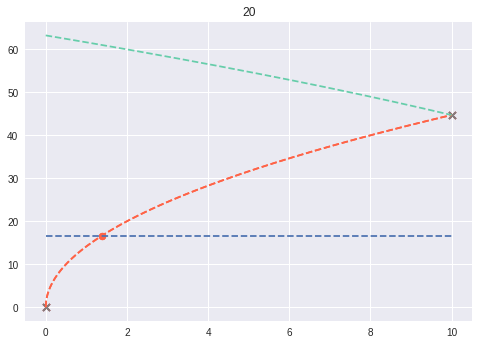

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


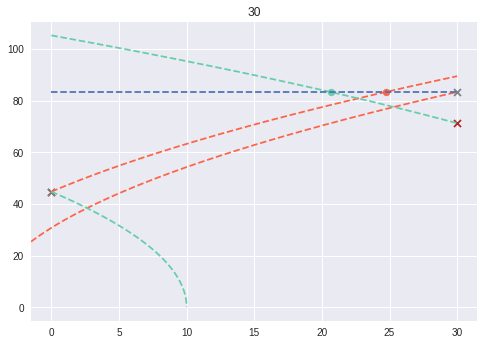

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


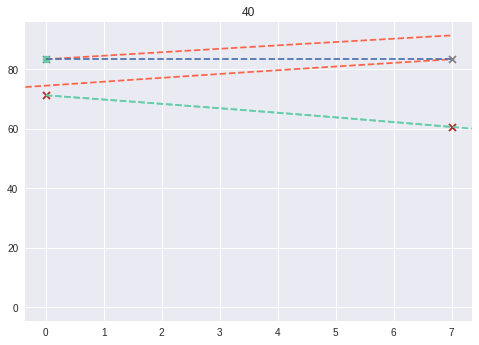

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


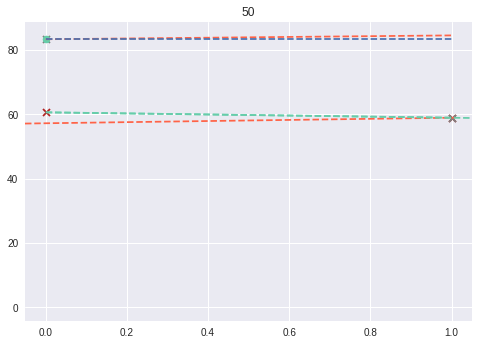

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


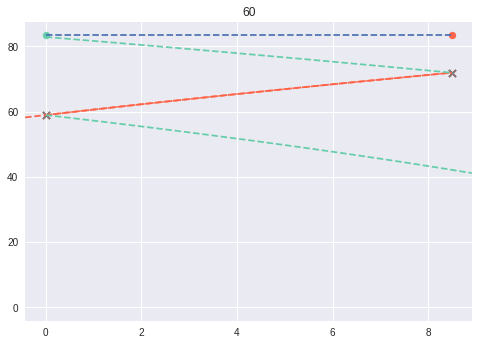

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


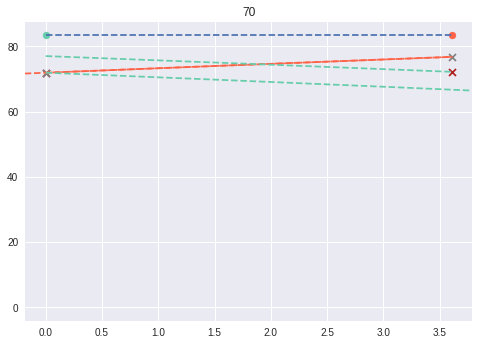

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


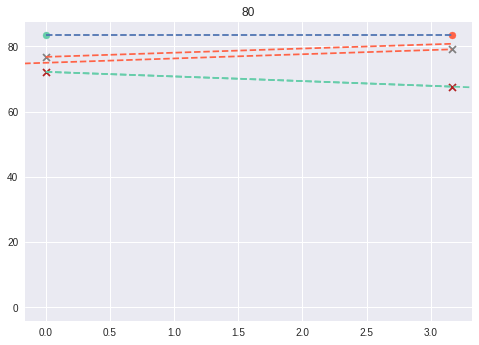

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


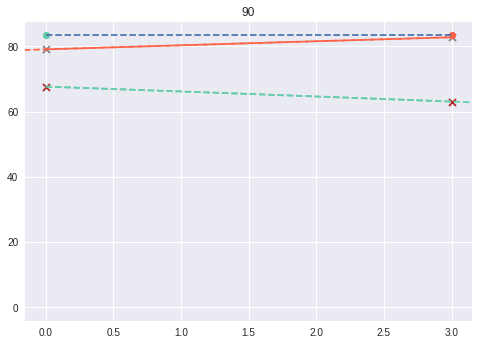

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


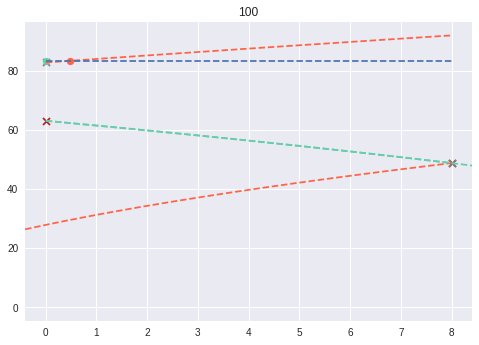

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


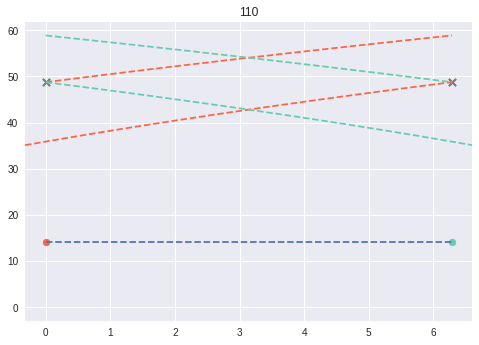

/tmp/ipykernel_53577/3444548656.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


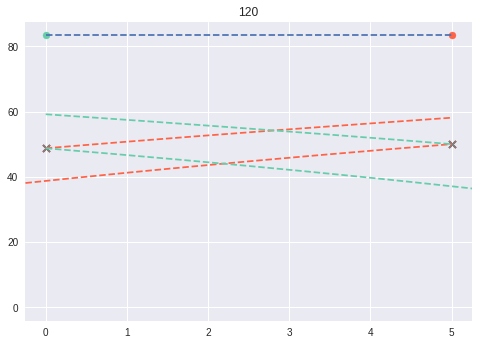

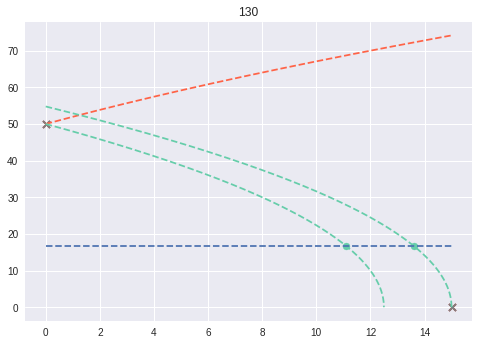

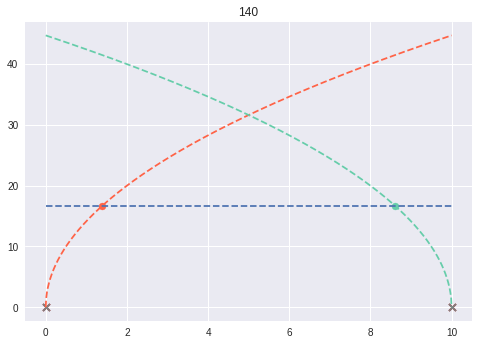

In [4]:
howmany = 15
for i in range(howmany):
    d = data.iloc[i]
    if (int(d.msk,2)&0b01111) != 0b01111:
        step = 0.01
        s0a = d.l - (d.vf_fwd**2)/(2*d.a)
        s0d = - (d.vi**2)/(-2*d.a)

        s_a_first_point = np.arange(stop=d.l + step, step = step)
        s_a_second_point = np.arange(start=s0a, stop=d.l + step, step=step)
        s_d_first_point = np.arange(stop=s0d + step, step = step)
        s_d_second_point = np.arange(start=0, stop=d.l + step, step=step)

        v1as = np.sqrt(2*d.a * s_a_first_point + pow(d.vi_fwd,2))
        v2as = np.sqrt(2*d.a * (s_a_second_point-s0a))
        v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))
        v2ds = np.sqrt(-2*d.a * (s_d_second_point-d.l) + pow(d.vf,2))

        plt.title(d.n)
        plt.plot(s_a_first_point, v1as, linestyle="--", color="tomato")
        plt.plot(s_a_second_point, v2as, linestyle="--", color="tomato")
        plt.plot(s_d_first_point, v1ds, linestyle="--", color="mediumaquamarine")
        plt.plot(s_d_second_point, v2ds, linestyle="--", color="mediumaquamarine")

        plt.scatter(0, d.vi, color="firebrick", marker='x')
        plt.scatter(d.l, d.vf,  color="firebrick", marker = 'x')
        plt.scatter(0, d.vi_fwd, color="grey", marker='x')
        plt.scatter(d.l, d.vf_fwd,  color="grey", marker = 'x')
        plt.hlines(d.v, 0, d.l, linestyle='--')

        color_s1 = "tomato" if (int(d.msk, 2) & 0b0100 > 0) else "mediumaquamarine"
        color_s2 = "tomato" if (int(d.msk, 2) & 0b1000 > 0) else "mediumaquamarine"
        plt.scatter(d.s1, d.v, color=color_s1)
        plt.scatter(d.s2, d.v, color=color_s2) 

        plt.xlim([-0.05 * d.l, d.l * (0.05 + 1)]) # extend the range of 5%
        plt.show()
    


In [5]:
int(d.msk,2)

6

In [6]:
0b1111

15